In [1]:
#!git clone https://github.com/Marlup/Simulation-of-investment-and-compound-returns.git

In [2]:
#import os
#os.chdir("./Simulation-of-investment-and-compound-returns")

In [18]:
# data processing
import numpy as np
import pandas as pd
# pyplot
from matplotlib import pyplot as plt
# seaborn
import seaborn as sns
# bokeh
from bokeh import plotting as bk
from bokeh.models import Span
from bokeh.io import output_notebook
from bokeh.models import HoverTool, ColumnDataSource
output_notebook()

# Compound utils
from compound import (
    get_compound_return,
    simulate_compound_return,
    build_dataframe,
    MONTHS_IN_YEAR,
    DEFAULT_RETIREMENT_YEARS,
    define_scenario, 
    plot_scenario_bokeh
)

Loading BokehJS ...

In [23]:
sns.set_style('darkgrid')
sns.color_palette("Paired")
sns.set_palette("Paired")

### Calculation of composed return. Composed return function

In [38]:
# Calculation of composed return. Composed return function
principal_amount = 10_000
annual_contribution = 150 * 12
roi = 0.06
years = 30
compounding_frequency = 12

periodic_contribution = annual_contribution / compounding_frequency

amount, accum_roi = get_compound_return(
    principal_amount,
    roi,
    compounding_frequency,
    periodic_contribution,
    years,
    True
    )
print(f"Total amount {amount}")
print(f"Accumulated roi {accum_roi}")

Total amount 72782.19
Accumulated roi 6.02


### Estimation of composed return. Simulation

Scenario

In [42]:
# @title Investing parameters for yields scenario

# Define initial parameters
initial_principal = 10000 # @param {type:"number", "min": 0.0, "max": 1.0e9}
monthly_contribution = 200 # @param {type:"number", "min": 0.0, "max": 1.0e9}
annual_contribution = monthly_contribution * 12
annual_roi = 0.06 # @param {type:"number", "min": 0.0, "max": 1.0}
duration = 60 # @param {type:"slider", "min": 0.0, "max": 150, "step": 1}
retirement_at = 30 # @param {type:"slider", "min": 0, "max": 150, "step": 1}
retirement_income = 1000 # @param {type:"number", "min": 0.0, "max": 1.0e9}
retirement_contribution_ratio = 0.1# @param {type:"number", "min": 0.001, "max": 1.0}
retirement_contribution = retirement_contribution_ratio * annual_contribution
inflation_rate = 0.04
tax_rate = 0.25
 # Compounding once per year
compounding_frequency = 12 # @param {type:"slider", "min": 0, "max": 24, "step": 1}

# Calculate the total balance and earnings using the updated function
total_balance, earnings, balances = simulate_compound_return(
    principal=initial_principal,
    annual_roi=annual_roi,
    compounding_frequency=compounding_frequency,
    annual_contribution=annual_contribution,
    investment_duration=duration,
    retirement_at=retirement_at,
    retirement_income=retirement_income,
    retirement_contribution=retirement_contribution,
    inflation_rate=inflation_rate,
    tax_percentage=tax_rate,
    return_time_yields=True
)

# Calculate total earnings, total input contribution, and earnings per contribution
total_earnings = sum(earnings)

# Print the results
print(f"Total balance after {duration} years:", round(total_balance, 2))
print("Total earnings:", round(total_earnings, 2))

# Basic plot setup
renderer_e, renderer_b = plot_scenario_bokeh(earnings,
                               balances,
                               initial_principal)

_ , _= bk.show(renderer_e), bk.show(renderer_b)

Total balance after 60 years: -169772.4
Total earnings: 106783.9


In [43]:
step_amount = 5_000
max_amount = 20_000
initial_amounts = np.arange(step_amount,
                            max_amount + step_amount,
                            step_amount)
virtual_returns = np.arange(0.06, 0.11, 0.01)
years_of_investment = [60]#np.arange(30, 30 + 5, 5)
inflation_rates = [0.0, 0.02, 0.03, 0.04, 0.05, 0.06]#np.arange(30, 30 + 5, 5)
retirement_years = 30
retir_incomes = [
    1.0e3,
    1.5e3,
    2.0e3,
    2.5e3,
    3.0e3
    ]
terms = (1, 3, 6, 12)
yearly_contributions = list(map(lambda x: 12 * x, range(50, 500, 50) ))
results = define_scenario(initial_amounts,
                          virtual_returns,
                          years_of_investment,
                          terms,
                          yearly_contributions,
                          inflation_rates,
                          retirement_years,
                          retir_incomes
                          )
df = build_dataframe(results)
df

,initial_amount,roi,duration,term,contribution,inflation_rate,retirement_income,retirement_contribution,total_amount
0,5000,0.06,60,1,600,0.00,1000.0,300.0,-237266.383488
1,5000,0.06,60,1,600,0.00,1500.0,300.0,-427658.014127
2,5000,0.06,60,1,600,0.00,2000.0,300.0,-611782.649049
3,5000,0.06,60,1,600,0.00,2500.0,300.0,-794004.017252
4,5000,0.06,60,1,600,0.00,3000.0,300.0,-975391.868926
...,...,...,...,...,...,...,...,...,...
21595,20000,0.10,60,12,5400,0.06,1000.0,2700.0,730722.928186
21596,20000,0.10,60,12,5400,0.06,1500.0,2700.0,396981.152625
21597,20000,0.10,60,12,5400,0.06,2000.0,2700.0,63239.377064
21598,20000,0.10,60,12,5400,0.06,2500.0,2700.0,-169300.358569


Case:

+ €15,000 initial amount
+ 0.09 expected roi
+ 1 maximum number of terms
+ [1,200, 2,400] € span monthly contributions
+ 30 years of investment
+ [1,500, 2,000] € span of retirement incomes
+ [0.02, 0.04] span of inflation rates


In [44]:
# Case
initial_amounts = (10_000, 10_000)
max_roi = 0.09
max_term = 1
contributions = (1200, 2400)
min_years = 60
retirement_incomes = (1000, 2000)
inflation_rates = (0.01, 0.06)

df_positive = df[df["total_amount"] > 0.0]
print(df_positive.shape)
df_case = df_positive[(df_positive["initial_amount"].between(initial_amounts[0], initial_amounts[1])) & \
                      (df_positive["roi"] <= max_roi) & \
                      (df_positive["term"] <= max_term) & \
                      (df_positive["contribution"].between(contributions[0], contributions[1])) & \
                      (df_positive["duration"] >= min_years) & \
                      (df_positive["retirement_income"].between(retirement_incomes[0], retirement_incomes[1])) & \
                      ((df_positive["inflation_rate"].between(inflation_rates[0], inflation_rates[1])))
                      ].sort_values(["retirement_income", "total_amount", "contribution"],
                                    ascending=False)
df_case.head()

(8096, 9)


,initial_amount,roi,duration,term,contribution,inflation_rate,retirement_income,retirement_contribution,total_amount
8737,10000,0.09,60,1,2400,0.02,2000.0,1200.0,4.524067e+05
8736,10000,0.09,60,1,2400,0.02,1500.0,1200.0,1.056741e+06
8706,10000,0.09,60,1,1800,0.02,1500.0,900.0,5.046417e+05
8741,10000,0.09,60,1,2400,0.03,1500.0,1200.0,2.832184e+05
7656,10000,0.08,60,1,2400,0.02,1500.0,1200.0,2.729684e+05


Case:
- €10,000 initial amount
- 30 years investment duration
- 12 months term
- €200 monthly contribution
- retirement income €1000
- 0.04 inflation rate

Number of cases: 5


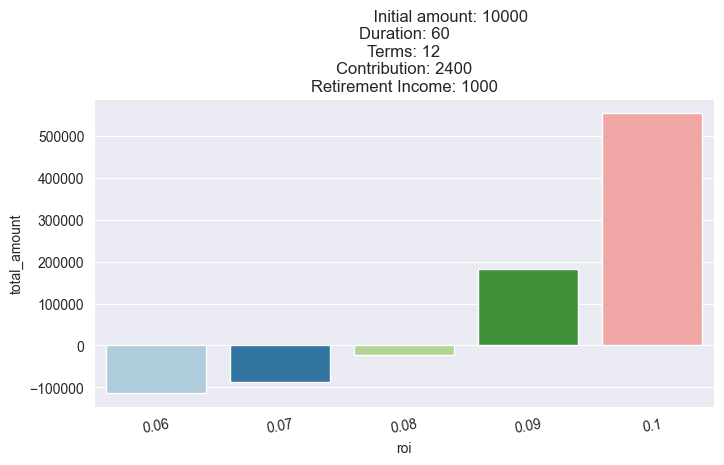

In [46]:
case_ini_amount = 10_000
case_years = 60
case_terms = 12
case_monthly_contribution = 200
case_annual_contribution = case_monthly_contribution * MONTHS_IN_YEAR
retir_income = 1000
inflation = 0.04
case_rois = df[(df["initial_amount"] == case_ini_amount) & \
                (df["duration"] == case_years) & \
                (df["term"] == case_terms) & \
                (df["contribution"] == case_annual_contribution) & \
                (df["retirement_income"] == retir_income) & \
                (df["inflation_rate"] == inflation)
                ][["roi", "total_amount"]].round(2)

print(f"Number of cases: {case_rois.shape[0]}")

plt.figure(figsize=(8, 4))
_ = sns.barplot(data=case_rois,
                x="roi",
                y="total_amount",
               )

title = f"Initial amount: {case_ini_amount}\nDuration: {case_years}\nTerms: {case_terms}\nContribution: {case_annual_contribution}\nRetirement Income: {retir_income}"
_ = plt.title(20*" " + title)
_ = plt.xticks(rotation=10)